<a href="https://colab.research.google.com/github/Kokoteros/Analisis-Datos-Informatorio-TP1/blob/main/Dataset_MercadoInt_Vino2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - ETL (Extraccion, Transformacion, Carga)

###Extracción

In [ ]:
# Instalación de librerías
!pip install pandas numpy matplotlib seaborn

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive

# Configuración de entorno visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("Librerías instaladas correctamente")

# Montar Google Drive
drive.mount('/content/drive')
ruta = "/content/drive/My Drive/Dataset/inv-mercado-interno-2024.csv"

# Carga de dataset
df = pd.read_csv(ruta)

# Vista previa
df.head(5)

###Transformacion

In [10]:
# Información general
print("Información general de los datos:")
df.info()
print("\nCantidad de filas y columnas:", df.shape)
print("\nPrimeras filas:")
display(df.head())

# Limpieza de duplicados y valores faltantes
print("\nCantidad de filas duplicadas:", df.duplicated().sum())
df = df.drop_duplicates()

print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Normalización de nombres de columnas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Corrección de tipos de datos
columnas_numericas = [
    'anio', 'mes', 'provincia_id', 'departamento_id',
    'localidad_id', 'anio_elaboracion', 'consumo'
]
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Limpieza de texto en columnas de tipo string
columnas_texto = [
    'provincia_nombre', 'departamento_nombre', 'localidad_nombre',
    'establecimiento', 'producto', 'grupo', 'envase',
    'i_geografica', 'variedad_1', 'variedad_2', 'variedad_3', 'tipo'
]
for col in columnas_texto:
    df[col] = df[col].astype(str).str.strip().str.title()

# Generación de variables derivadas
df['varietal_principal'] = df['variedad_1'].fillna(df['variedad_2'])

# Clasificación del envase (botella vs damajuana vs otros)
df['tipo_envase'] = df['envase'].apply(
    lambda x: 'Botella' if 'botella' in x.lower()
    else 'Damajuana' if 'damajuana' in x.lower()
    else 'Otro'
)

# Participación porcentual del consumo por provincia
df['participacion_provincia_%'] = (
    df.groupby('provincia_nombre')['consumo']
      .transform(lambda x: (x / x.sum()) * 100)
)

# Consumo total por combinación año-varietal
df['consumo_total_varietal'] = df.groupby(['anio', 'varietal_principal'])['consumo'].transform('sum')

# Verificación final
print("\nDataset transformado correctamente:")
print("Filas y columnas:", df.shape)
display(df.head(10))
print("\nColumnas finales:", df.columns.tolist())

# Dejar DataFrame final listo para análisis
df_final = df.copy()

Información general de los datos:
<class 'pandas.core.frame.DataFrame'>
Index: 41944 entries, 0 to 41974
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   anio                 41944 non-null  int64 
 1   mes                  41944 non-null  int64 
 2   provincia_id         41944 non-null  int64 
 3   provincia_nombre     41944 non-null  object
 4   departamento_id      41944 non-null  int64 
 5   departamento_nombre  41944 non-null  object
 6   localidad_id         41944 non-null  object
 7   localidad_nombre     41944 non-null  object
 8   establecimiento      41944 non-null  object
 9   producto             41944 non-null  object
 10  grupo                41944 non-null  object
 11  envase               41944 non-null  object
 12  i_geografica         41944 non-null  object
 13  variedad_1           41944 non-null  object
 14  variedad_2           41944 non-null  object
 15  variedad_3           419

,anio,mes,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,establecimiento,producto,grupo,envase,i_geografica,variedad_1,variedad_2,variedad_3,anio_elaboracion,tipo,consumo
0,2024,1,6,Buenos Aires,6028,Almirante Brown,06028010,Burzaco,planta de fraccionamiento,vino varietal tinto,varietal,lata,-,Malbec,-,-,2021,fraccionado,719
1,2024,1,6,Buenos Aires,6063,Balcarce,06063010,Balcarce,bodega,vino varietal blanco,varietal,botella,Balcarce,Riesling,-,-,2022,fraccionado,2
2,2024,1,6,Buenos Aires,6063,Balcarce,06063010,Balcarce,bodega,vino varietal blanco,varietal,botella,Balcarce,Riesling,-,-,2021,fraccionado,2
3,2024,1,6,Buenos Aires,6063,Balcarce,06063010,Balcarce,bodega,vino varietal blanco,varietal,botella,Balcarce,Chardonnay,-,-,2020,fraccionado,1
4,2024,1,6,Buenos Aires,6063,Balcarce,06063010,Balcarce,bodega,vino varietal blanco,varietal,botella,Balcarce,Alvarinho,-,-,2018,fraccionado,2



Cantidad de filas duplicadas: 0

Valores faltantes por columna:
anio                   0
mes                    0
provincia_id           0
provincia_nombre       0
departamento_id        0
departamento_nombre    0
localidad_id           0
localidad_nombre       0
establecimiento        0
producto               0
grupo                  0
envase                 0
i_geografica           0
variedad_1             0
variedad_2             0
variedad_3             0
anio_elaboracion       0
tipo                   0
consumo                0
dtype: int64

Dataset transformado correctamente:
Filas y columnas: (41944, 23)


,anio,mes,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,establecimiento,producto,grupo,envase,i_geografica,variedad_1,variedad_2,variedad_3,anio_elaboracion,tipo,consumo,varietal_principal,tipo_envase,participacion_provincia_%,consumo_total_varietal
0,2024,1,6,Buenos Aires,6028,Almirante Brown,6028010.00,Burzaco,Planta De Fraccionamiento,Vino Varietal Tinto,Varietal,Lata,-,Malbec,-,-,2021,Fraccionado,719,Malbec,Otro,0.05,123750647
1,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Riesling,-,-,2022,Fraccionado,2,Riesling,Botella,0.00,54614
2,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Riesling,-,-,2021,Fraccionado,2,Riesling,Botella,0.00,54614
3,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Chardonnay,-,-,2020,Fraccionado,1,Chardonnay,Botella,0.00,8096950
4,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Alvarinho,-,-,2018,Fraccionado,2,Alvarinho,Botella,0.00,6242
5,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Tinto,Varietal,Botella,Balcarce,Pinot Negro,-,-,2021,Fraccionado,5,Pinot Negro,Botella,0.00,1504158
6,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Tinto,Varietal,Botella,Balcarce,Pinot Negro,-,-,2020,Fraccionado,2,Pinot Negro,Botella,0.00,1504158
7,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Tinto,Varietal,Botella,Balcarce,Tannat,-,-,2020,Fraccionado,135,Tannat,Botella,0.01,779785
8,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Tinto,Varietal,Botella,Balcarce,Tannat,-,-,2019,Fraccionado,5,Tannat,Botella,0.00,779785
9,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Riesling,-,-,2020,Fraccionado,2,Riesling,Botella,0.00,54614



Columnas finales: ['anio', 'mes', 'provincia_id', 'provincia_nombre', 'departamento_id', 'departamento_nombre', 'localidad_id', 'localidad_nombre', 'establecimiento', 'producto', 'grupo', 'envase', 'i_geografica', 'variedad_1', 'variedad_2', 'variedad_3', 'anio_elaboracion', 'tipo', 'consumo', 'varietal_principal', 'tipo_envase', 'participacion_provincia_%', 'consumo_total_varietal']


###Carga

In [11]:
# Carga de salida
ruta_salida = '/content/drive/MyDrive/Dataset/mercado_interno_vino_2024_limpio.csv'

# Guardar DataFrame transformado
df_final.to_csv(ruta_salida, index=False, encoding='utf-8-sig')

print(f"Carga completada correctamente. Archivo guardado en:\n{ruta_salida}")

# Verificar lectura rápida del archivo guardado
df_verificacion = pd.read_csv(ruta_salida)
print("\nVerificación del archivo guardado:")
display(df_verificacion.head())

Carga completada correctamente. Archivo guardado en:
/content/drive/MyDrive/Dataset/mercado_interno_vino_2024_limpio.csv

Verificación del archivo guardado:


,anio,mes,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,establecimiento,producto,grupo,envase,i_geografica,variedad_1,variedad_2,variedad_3,anio_elaboracion,tipo,consumo,varietal_principal,tipo_envase,participacion_provincia_%,consumo_total_varietal
0,2024,1,6,Buenos Aires,6028,Almirante Brown,6028010.00,Burzaco,Planta De Fraccionamiento,Vino Varietal Tinto,Varietal,Lata,-,Malbec,-,-,2021,Fraccionado,719,Malbec,Otro,0.05,123750647
1,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Riesling,-,-,2022,Fraccionado,2,Riesling,Botella,0.00,54614
2,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Riesling,-,-,2021,Fraccionado,2,Riesling,Botella,0.00,54614
3,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Chardonnay,-,-,2020,Fraccionado,1,Chardonnay,Botella,0.00,8096950
4,2024,1,6,Buenos Aires,6063,Balcarce,6063010.00,Balcarce,Bodega,Vino Varietal Blanco,Varietal,Botella,Balcarce,Alvarinho,-,-,2018,Fraccionado,2,Alvarinho,Botella,0.00,6242


##2 - EDA (Análisis Exploratorio de datos)

###Consumo por año de elavoración

In [14]:
consumo_por_anio = (
    df_final.groupby('anio_elaboracion', as_index=False)['consumo']
    .sum()
    .sort_values('anio_elaboracion')
)
print("\nConsumo total por año de elaboración:")
display(consumo_por_anio)



Consumo total por año de elaboración:


,anio_elaboracion,consumo
0,0,156177715
1,1890,225
2,2002,9
3,2004,715
4,2005,99
5,2006,402
6,2007,1680
7,2008,4260
8,2009,1677
9,2010,115038


### Consumo por tipo de envase

In [15]:
consumo_por_envase = (
    df_final.groupby('tipo_envase', as_index=False)['consumo']
    .sum()
    .sort_values('consumo', ascending=False)
)
print("\nConsumo total por tipo de envase:")
display(consumo_por_envase)


Consumo total por tipo de envase:


,tipo_envase,consumo
0,Botella,484837636
2,Otro,258678042
1,Damajuana,22382083


### Consumo por varietal

In [16]:
consumo_por_varietal = (
    df_final.groupby('varietal_principal', as_index=False)['consumo']
    .sum()
    .sort_values('consumo', ascending=False)
    .head(10)
)
print("\nTop 10 varietales por consumo total:")
display(consumo_por_varietal)


Top 10 varietales por consumo total:


,varietal_principal,consumo
0,-,539151120
30,Malbec,123750647
12,Cabernet Sauvignon,26253738
63,Torrontes Riojano,14126172
59,Syrah,13490397
9,Bonarda,12852746
19,Chardonnay,8096950
35,Merlot,5045655
56,Sauvignon Blanc,4346758
20,Chenin,4114613


### Consumo por provincia

In [17]:
consumo_por_provincia = (
    df_final.groupby('provincia_nombre', as_index=False)['consumo']
    .sum()
    .sort_values('consumo', ascending=False)
    .head(10)
)
print("\nTop 10 provincias por consumo total:")
display(consumo_por_provincia)


Top 10 provincias por consumo total:


,provincia_nombre,consumo
8,Mendoza,644839165
12,San Juan,86118070
7,La Rioja,14334888
11,Salta,12813069
9,Neuquén,3782943
0,Buenos Aires,1407158
10,Río Negro,1258486
3,Córdoba,599939
1,Catamarca,271375
6,La Pampa,113648


### Consumo promedio por tipo de vino

In [18]:
consumo_por_tipo = (
    df_final.groupby('tipo', as_index=False)['consumo']
    .mean()
    .sort_values('consumo', ascending=False)
)
print("\nConsumo promedio por tipo de vino:")
display(consumo_por_tipo)


Consumo promedio por tipo de vino:


,tipo,consumo
0,Fraccionado,18260.21
1,Granel,13940.00


# 3 - Preguntas de Negocio

### ¿Qué varietales concentran el mayor volumen de consumo en el mercado interno durante 2024?

Top 10 varietales más consumidos:


,varietal_principal,consumo
29,Malbec,123750647
11,Cabernet Sauvignon,26253738
62,Torrontes Riojano,14126172
58,Syrah,13490397
8,Bonarda,12852746
18,Chardonnay,8096950
34,Merlot,5045655
55,Sauvignon Blanc,4346758
19,Chenin,4114613
10,Cabernet Franc,2586221


/tmp/ipython-input-2546239124.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


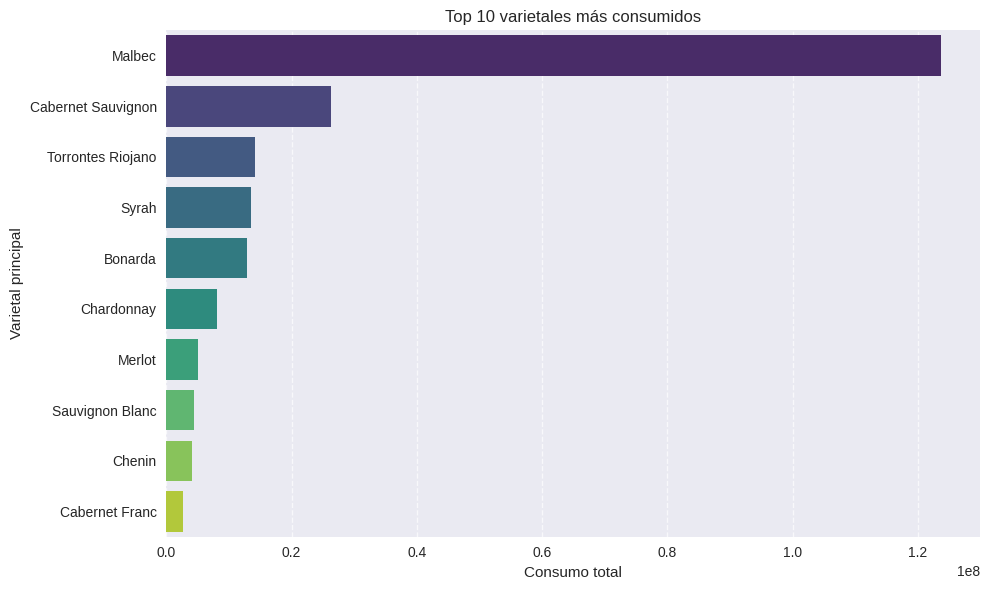

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar valores vacíos o guion en varietal_principal
df_varietal = df_final.copy()
df_varietal['varietal_principal'] = df_varietal['varietal_principal'].replace(['-', ' ', '', None, np.nan], np.nan)
df_varietal = df_varietal.dropna(subset=['varietal_principal'])

# Agrupar por varietal principal
consumo_varietal = (
    df_varietal.groupby('varietal_principal', as_index=False)['consumo']
    .sum()
    .sort_values('consumo', ascending=False)
)

# Mostrar las 10 variedades más consumidas
top_varietales = consumo_varietal.head(10)

# Tabla resumen
print("Top 10 varietales más consumidos:")
display(top_varietales)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    x='consumo',
    y='varietal_principal',
    data=top_varietales,
    palette='viridis'
)
plt.title('Top 10 varietales más consumidos')
plt.xlabel('Consumo total')
plt.ylabel('Varietal principal')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Como se observa los varietales con mayor volumen de consumo representan los tintos como Malbec, Cabernet Sauvignon o Syrah que lideran el ranking, reflejando su alta demanda y presencia en la producción nacional.

### ¿Qué tipo de envase concentra mayor consumo en el mercado interno?

Top 10 tipos de envase con mayor consumo:


,envase,consumo
4,Botella,484837636
7,Tetra,255105887
5,Damajuana,22382083
1,Bag In Box,2128124
6,Lata,1046353
2,Bidon,360458
0,Acero Inoxidab Consumo Directo,22220
3,Bins,15000



Distribución porcentual del consumo por envase:


,envase,consumo,porcentaje
4,Botella,484837636,63.30
7,Tetra,255105887,33.31
5,Damajuana,22382083,2.92
1,Bag In Box,2128124,0.28
6,Lata,1046353,0.14
2,Bidon,360458,0.05
0,Acero Inoxidab Consumo Directo,22220,0.00
3,Bins,15000,0.00


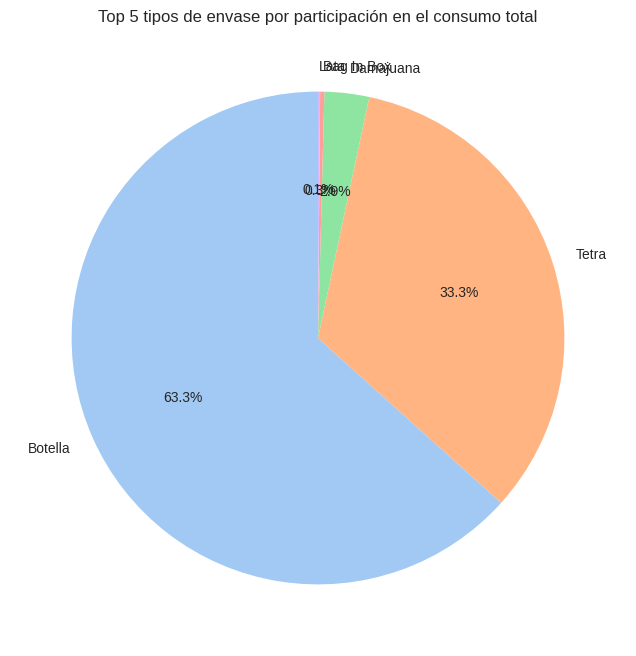

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar valores no válidos en la columna 'envase'
df_envase = df_final.copy()
df_envase['envase'] = df_envase['envase'].replace(['-', ' ', '', None, np.nan], np.nan)
df_envase = df_envase.dropna(subset=['envase'])

# Agrupar por tipo de envase
consumo_envase = (
    df_envase.groupby('envase', as_index=False)['consumo']
    .sum()
    .sort_values('consumo', ascending=False)
)

# Mostrar tabla con los 10 principales tipos de envase
print("Top 10 tipos de envase con mayor consumo:")
display(consumo_envase.head(10))

# Gráfico
consumo_envase_pct = consumo_envase.copy()
consumo_envase_pct['porcentaje'] = (
    consumo_envase_pct['consumo'] / consumo_envase_pct['consumo'].sum() * 100
)

print("\nDistribución porcentual del consumo por envase:")
display(consumo_envase_pct.head(10))

plt.figure(figsize=(8, 8))
plt.pie(
    consumo_envase_pct['porcentaje'].head(5),
    labels=consumo_envase_pct['envase'].head(5),
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Top 5 tipos de envase por participación en el consumo total')
plt.show()

El tipo de envase predominante indicaría los canales de comercialización más relevantes son la botella, que sería el mercado que tiende a la venta minorista y consumo premium del mismo.
La damajuana sugiere mayor presencia en el consumo escala comercial de grandes volumenes.

### ¿Qué provincias presentan mayor nivel de consumo interno?

Top 10 provincias con mayor consumo de vino:


,provincia_nombre,consumo
8,Mendoza,644839165
12,San Juan,86118070
7,La Rioja,14334888
11,Salta,12813069
9,Neuquén,3782943
0,Buenos Aires,1407158
10,Río Negro,1258486
3,Córdoba,599939
1,Catamarca,271375
6,La Pampa,113648


/tmp/ipython-input-660366574.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


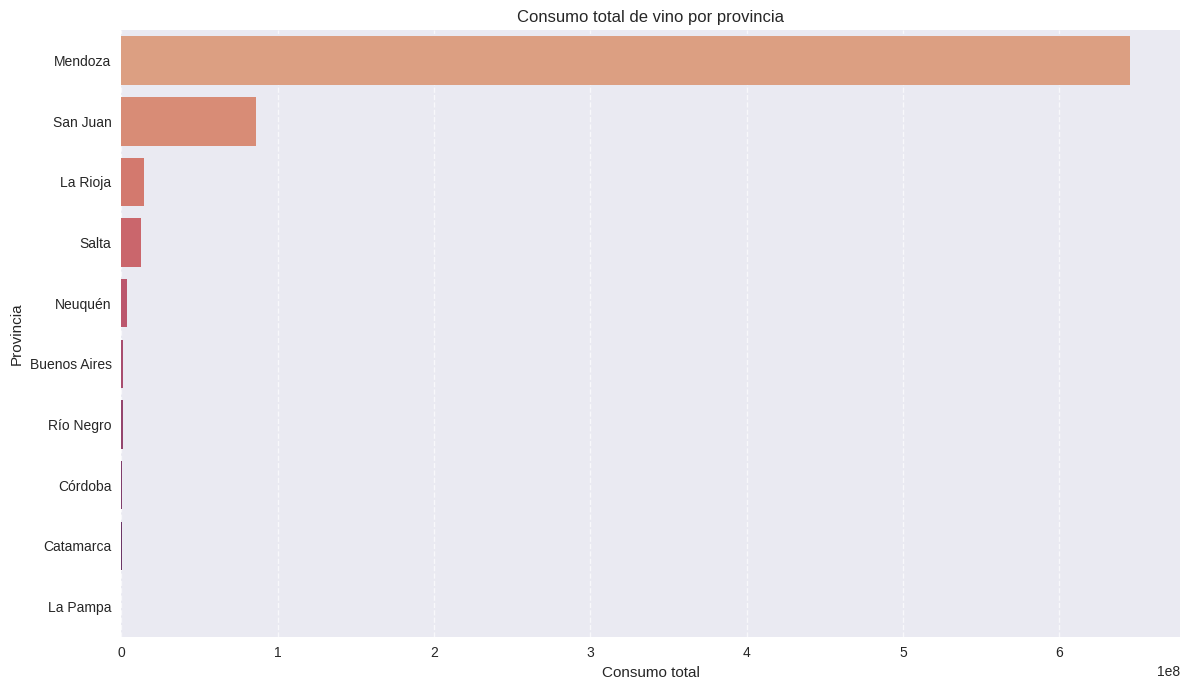


Distribución porcentual del consumo por provincia:


,provincia_nombre,consumo,porcentaje
8,Mendoza,644839165,84.19
12,San Juan,86118070,11.24
7,La Rioja,14334888,1.87
11,Salta,12813069,1.67
9,Neuquén,3782943,0.49
0,Buenos Aires,1407158,0.18
10,Río Negro,1258486,0.16
3,Córdoba,599939,0.08
1,Catamarca,271375,0.04
6,La Pampa,113648,0.01


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar valores no válidos en la columna 'provincia_nombre'
df_prov = df_final.copy()
df_prov['provincia_nombre'] = df_prov['provincia_nombre'].replace(['-', ' ', '', None, np.nan], np.nan)
df_prov = df_prov.dropna(subset=['provincia_nombre'])

# Agrupar por provincia
consumo_prov = (
    df_prov.groupby('provincia_nombre', as_index=False)['consumo']
    .sum()
    .sort_values('consumo', ascending=False)
)

# Mostrar tabla de las 10 provincias con mayor consumo
print("Top 10 provincias con mayor consumo de vino:")
display(consumo_prov.head(10))

# Gráfico
plt.figure(figsize=(12, 7))
sns.barplot(
    x='consumo',
    y='provincia_nombre',
    data=consumo_prov.head(10),
    palette='flare'
)
plt.title('Consumo total de vino por provincia')
plt.xlabel('Consumo total')
plt.ylabel('Provincia')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análisis porcentual
consumo_prov_pct = consumo_prov.copy()
consumo_prov_pct['porcentaje'] = consumo_prov_pct['consumo'] / consumo_prov_pct['consumo'].sum() * 100

print("\nDistribución porcentual del consumo por provincia:")
display(consumo_prov_pct.head(10))

Podemos obserbar que las provincias con mayor consumo reflejan no solo por el tamaño de su población sino tambien por su su cultura vitivinícola.
Sí bien Buenos Aires suele liderar por densidad poblacional, Mendoza y San Juan destacan por su fuerte tradición productora y consumo local.